# Best Photo Selection

*   With organic data of our own collection. Baseline Model Vgg-16.


## Giving a score for how good or bad a photograph is.

Train data is based on:

*   400 good photos.
*   400 bad photos.

Validation data is based on:

*   100 good photos.
*   100 bad photos.

Test data is based on:

*   100 good photos.
*   100 bad photos.

In [1]:
# loading libraries
import numpy as np
import os
from PIL import Image

### Step 1: Upload the photos to train and test folders. Each folder containing "bad" and "good" folders. Or mount the folders from google drive.

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# Upload organic data
!unzip organic.zip

Archive:  organic.zip
   creating: organic/
   creating: organic/test/
   creating: organic/test/bad/
  inflating: organic/test/bad/1x08.jpg  
  inflating: organic/test/bad/20140421_102006.jpg  
  inflating: organic/test/bad/20161112_154253.jpg  
  inflating: organic/test/bad/20161201_184006.jpg  
  inflating: organic/test/bad/20170729_191758.jpg  
  inflating: organic/test/bad/20170922_222236.jpg  
  inflating: organic/test/bad/20190103_084049.jpg  
  inflating: organic/test/bad/20190325_190942.jpg  
  inflating: organic/test/bad/20190613_085824.jpg  
  inflating: organic/test/bad/244BDCEB-B9E9-4223-A81B-B161F2A12CA6.jpg  
  inflating: organic/test/bad/aiony-haust-f2ar0ltTvaI-unsplash.jpg  
  inflating: organic/test/bad/alena-plotnikova-Ke5LK0X0MjI-unsplash.jpg  
  inflating: organic/test/bad/andy-gusnan-J-FaonCcC6Y-unsplash.jpg  
  inflating: organic/test/bad/annie-spratt-Ewfrjh0GvtY-unsplash.jpg  
  inflating: organic/test/bad/annie-spratt-Nap1YhD7_og-unsplash.jpg  
  inflating: org

### Step 2: Data preparation

In [4]:
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(validation_split=0.2)

In [5]:
train_data = img_gen.flow_from_directory(
    'organic/train/',
    class_mode='binary',
    batch_size=64,
    target_size=(224, 224),
    subset='training',
)

Found 800 images belonging to 2 classes.


In [6]:
valid_data = img_gen.flow_from_directory(
    'organic/train/',
    class_mode='binary',
    batch_size=64,
    target_size=(224, 224),
    subset='validation',
)

Found 200 images belonging to 2 classes.


In [7]:
print('there are 800 images in the training set and', len(train_data), 'mini-batches')
print('there are 200 images in the validation set and', len(valid_data), 'mini-batches')

there are 800 images in the training set and 13 mini-batches
there are 200 images in the validation set and 4 mini-batches


### Step 3: A baseline model using a VGG16 model (CNN)

In [8]:
import tensorflow as tf
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [9]:
import tensorflow
vgg_model = tensorflow.keras.applications.vgg16.VGG16(include_top=False, input_shape=(224, 224, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [10]:
print('there are', len(vgg_model.layers), 'layers in vgg_model')
print('there are', vgg_model.count_params(), 'parameters in vgg_model')

there are 19 layers in vgg_model
there are 14714688 parameters in vgg_model


In [11]:
print('input shape is', vgg_model.input_shape)
print('output shape is', vgg_model.output_shape)
vgg_model.summary()

input shape is (None, 224, 224, 3)
output shape is (None, 7, 7, 512)
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    vgg_model.layers + 
    [
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
assert model.count_params() == 17926209

In [14]:
vgg_model.trainable=False

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [16]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [17]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [18]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.fit(train_data, validation_data=valid_data, batch_size=16, steps_per_epoch=len(train_data), validation_steps=len(valid_data), epochs=10, callbacks=[cp_callback])

Epoch 1/10
13/13 [==============================] - ETA: 0s - loss: 12.1936 - accuracy: 0.6463
Epoch 1: saving model to training_1/cp.ckpt
13/13 [==============================] - 27s 1s/step - loss: 12.1936 - accuracy: 0.6463 - val_loss: 0.7974 - val_accuracy: 0.8200
Epoch 2/10
13/13 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.8700
Epoch 2: saving model to training_1/cp.ckpt
13/13 [==============================] - 8s 675ms/step - loss: 0.4212 - accuracy: 0.8700 - val_loss: 1.1850 - val_accuracy: 0.7450
Epoch 3/10
13/13 [==============================] - ETA: 0s - loss: 0.0628 - accuracy: 0.9712
Epoch 3: saving model to training_1/cp.ckpt
13/13 [==============================] - 9s 693ms/step - loss: 0.0628 - accuracy: 0.9712 - val_loss: 1.8651 - val_accuracy: 0.6850
Epoch 4/10
13/13 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9950
Epoch 4: saving model to training_1/cp.ckpt
13/13 [==============================] - 8s 649ms/step 

In [19]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

#### Pickling the model

In [20]:
# import pickle
# pickle.dump(model, open('training_1/model.pkl', 'wb'))

#### Zip the model and train data and download the files to local computer

In [21]:
!zip -r /content/model.zip /content/training_1
!zip -r /content/train.zip /content/organic/train
!zip -r /content/test.zip /content/organic/test

  adding: content/training_1/ (stored 0%)
  adding: content/training_1/cp.ckpt.data-00000-of-00001 (deflated 9%)
  adding: content/training_1/checkpoint (deflated 38%)
  adding: content/training_1/cp.ckpt.index (deflated 67%)
  adding: content/organic/train/ (stored 0%)
  adding: content/organic/train/bad/ (stored 0%)
  adding: content/organic/train/bad/allef-vinicius-DJNoNHpQK_I-unsplash.jpg (deflated 1%)
  adding: content/organic/train/bad/marie-michele-bouchard-LzBiWjPChgc-unsplash.jpg (deflated 0%)
  adding: content/organic/train/bad/nathan-dumlao-C1BYZq1Ea0o-unsplash.jpg (deflated 2%)
  adding: content/organic/train/bad/tiko-giorgadze-WSH-upIXDNA-unsplash.jpg (deflated 0%)
  adding: content/organic/train/bad/oleg-ivanov-NWT7mww0RPw-unsplash.jpg (deflated 1%)
  adding: content/organic/train/bad/IMG_20220310_024015602.jpg (deflated 12%)
  adding: content/organic/train/bad/tim-doerfler-dYNar7pk9_Y-unsplash.jpg (deflated 0%)
  adding: content/organic/train/bad/IMG_20191217_203516992.j

In [22]:
from google.colab import files
files.download("/content/model.zip")
files.download("/content/train.zip")
files.download("/content/test.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Step 4: testing the model

In [23]:
threshold = 0.5

In [24]:
test_data = img_gen.flow_from_directory(
    'organic/test/',
    target_size=(224, 224),
    class_mode=None,
    shuffle=False,
)

Found 200 images belonging to 2 classes.


In [25]:
pred = model.predict_generator(generator=test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [26]:
y_true = test_data.classes
y_pred = pred > threshold

#### Confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true, y_pred)

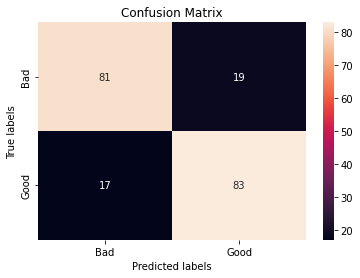

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt

ax = plt.subplot()
sns.heatmap(mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Bad', 'Good']); ax.yaxis.set_ticklabels(['Bad', 'Good']);

#### Classification report

In [29]:
from sklearn.metrics import classification_report
target_names = ['bad', 'good']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         bad       0.83      0.81      0.82       100
        good       0.81      0.83      0.82       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



#### Evaluating samples of test data

In [30]:
def evaluate(img_fname):
    img = image.load_img(img_fname, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    pred = model.predict(x)[0][0]
    pred_class = 'good' if pred > threshold else 'bad'
    pred = pred if pred_class == 'good' else 1 - pred
    print('Predicted:', pred_class, 'with prediction (confidence) of ' + str(round(pred, 3)))
    plt.imshow(img)
    plt.show()

Predicted: good with prediction (confidence) of 1.0


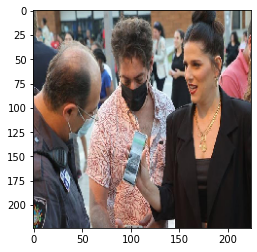

Predicted: bad with prediction (confidence) of 0.999


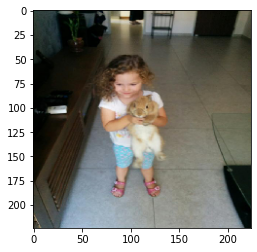

Predicted: bad with prediction (confidence) of 0.994


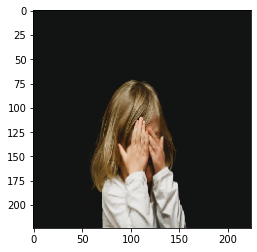

Predicted: good with prediction (confidence) of 1.0


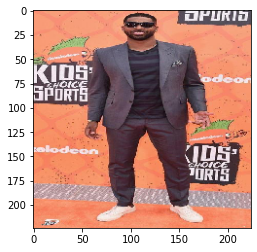

Predicted: bad with prediction (confidence) of 0.956


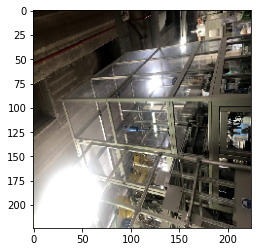

Predicted: bad with prediction (confidence) of 0.997


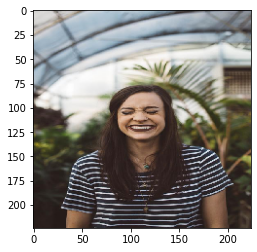

Predicted: bad with prediction (confidence) of 0.642


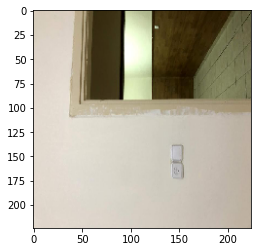

Predicted: bad with prediction (confidence) of 1.0


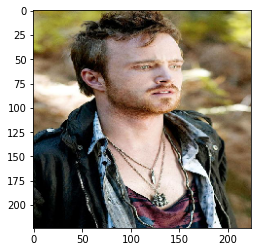

Predicted: good with prediction (confidence) of 1.0


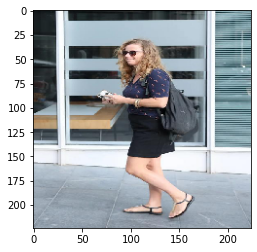

Predicted: good with prediction (confidence) of 0.971


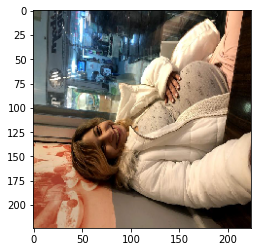

In [31]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random

for img in random.sample(test_data.filenames, 10):
    evaluate('organic/test/' + str(img))